## Dataset

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Cleaning

In [7]:
data = data.drop_duplicates()

In [8]:
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [9]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(data[data['BloodPressure']==0].shape[0])
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

35
5
227
374
11


In [10]:
#replacing 0 values with median of that column
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())#normal distribution
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())#normal distribution
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())#skewed distribution
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())#skewed distribution
data['BMI']=data['BMI'].replace(0,data['BMI'].median())#skewed distribution

## Data Visualization

In [11]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

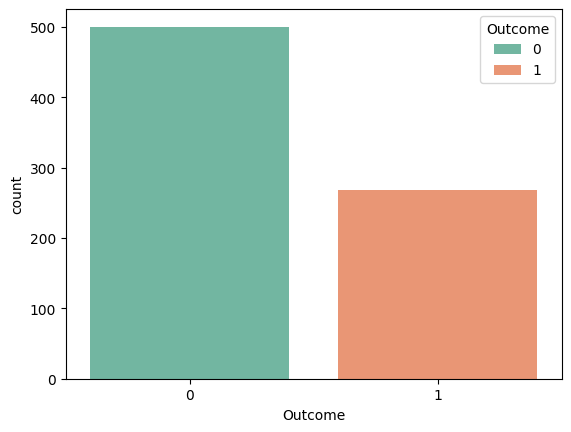

In [12]:
sns.countplot(x=data["Outcome"], data=data, hue=data["Outcome"], palette='Set2')

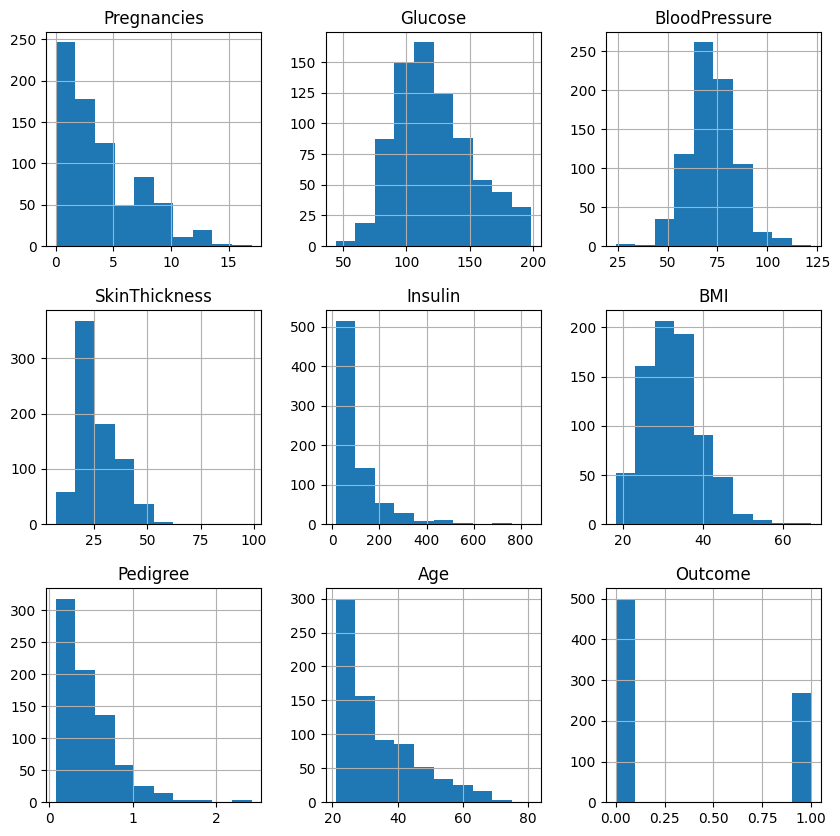

In [13]:
#histogram for each  feature
data.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: xlabel='Pedigree'>

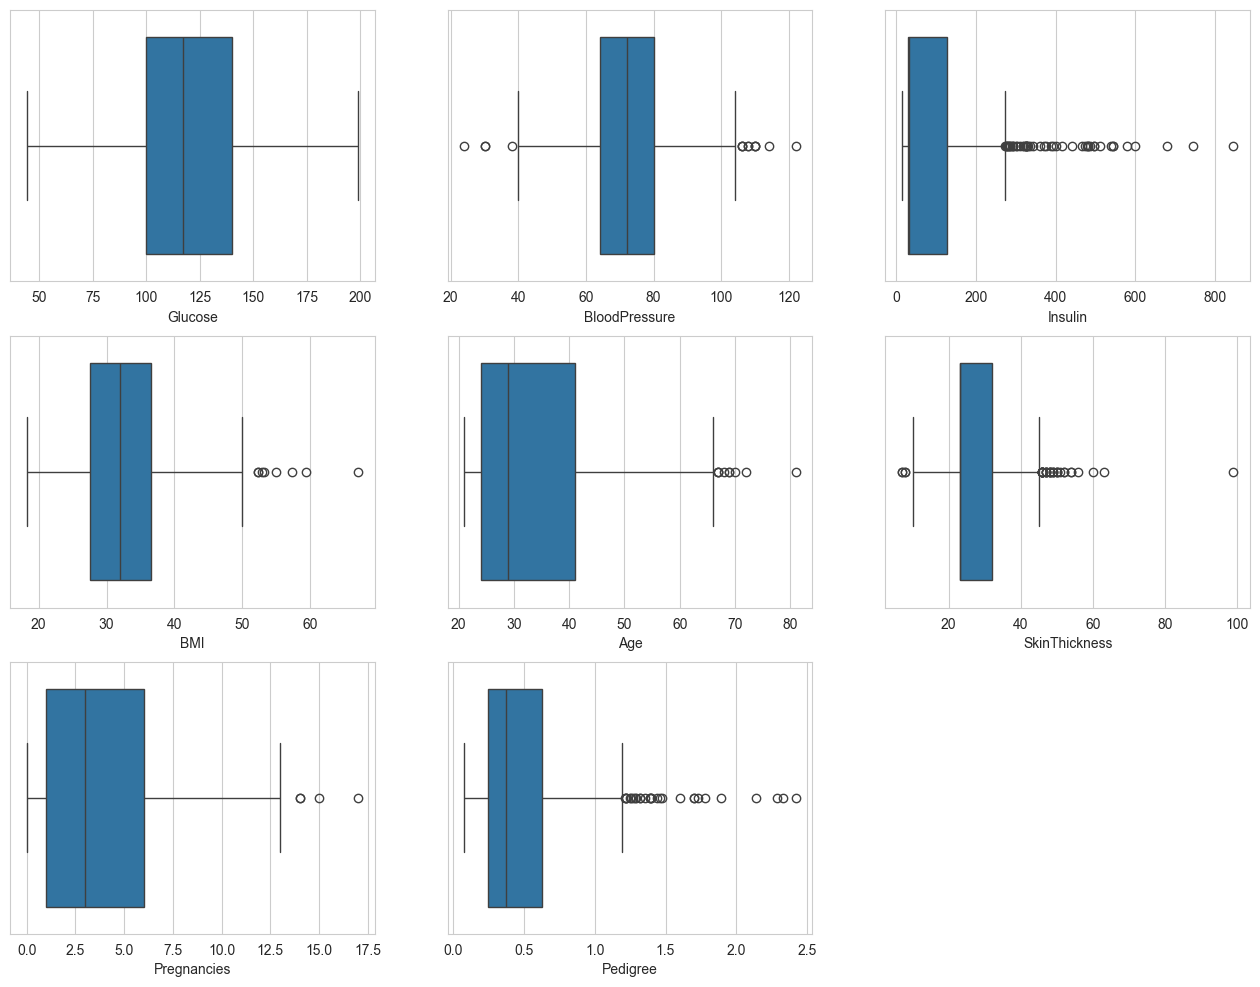

In [14]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=data)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=data)
plt.subplot(3,3,8)
sns.boxplot(x='Pedigree',data=data)

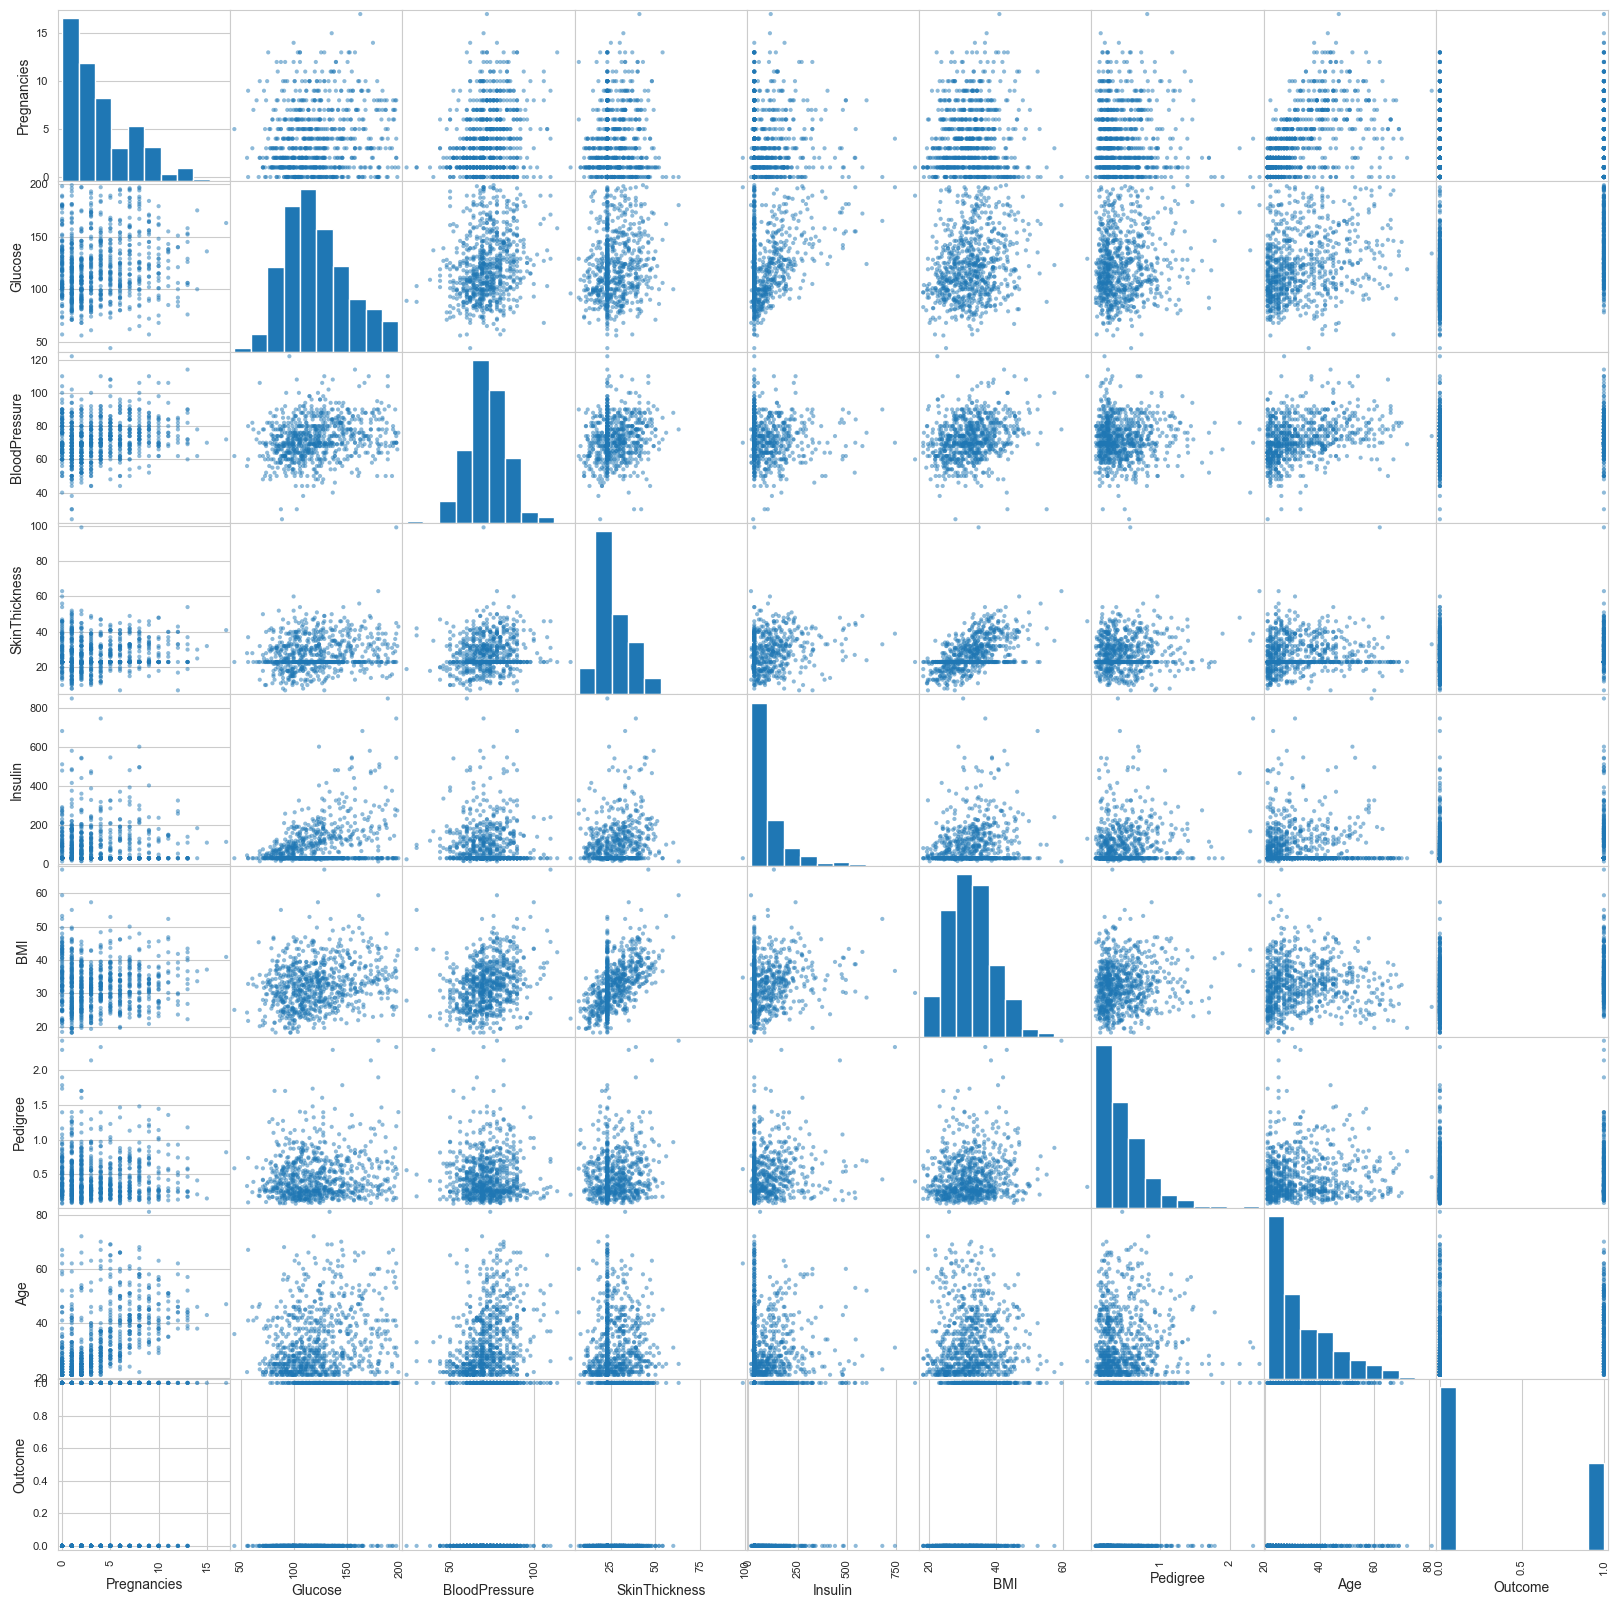

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(20,20));
# we can come to various conclusion looking at these plots for example  if you observe 5th plot in pregnancies with insulin, you can conclude that women with higher number of pregnancies have lower insulin

<Axes: >

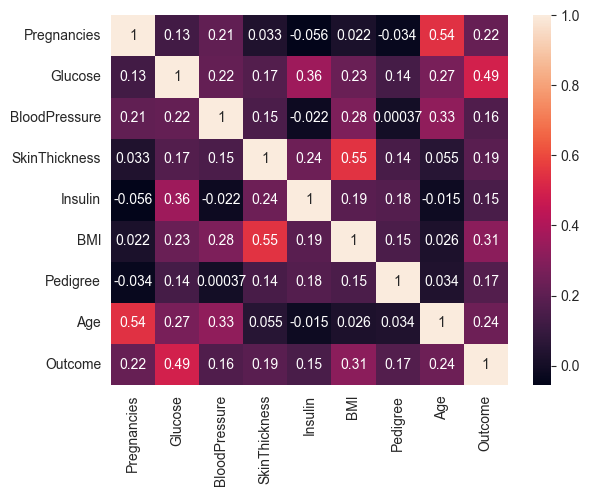

In [16]:
corrmat=data.corr()
sns.heatmap(corrmat, annot=True)

Dapat diketahui bahwa BloodPressure, Insulin, Pedigree adalah yang paling sedikit berkorelasi, oleh karena itu fungsi-fungsi tersebut tidak berkontribusi banyak pada model sehingga dapat menghilangkannya

In [17]:
data_selected=data.drop(['BloodPressure','Insulin','Pedigree'], axis='columns')

## Handling Outliers

In [18]:
from sklearn.preprocessing import QuantileTransformer
x = data_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
data_new=pd.DataFrame(X)
data_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
data_new.head()

c:\Users\lapto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


Mengurangi outlier dengan melakukan transformasi quantile

<Axes: xlabel='SkinThickness'>

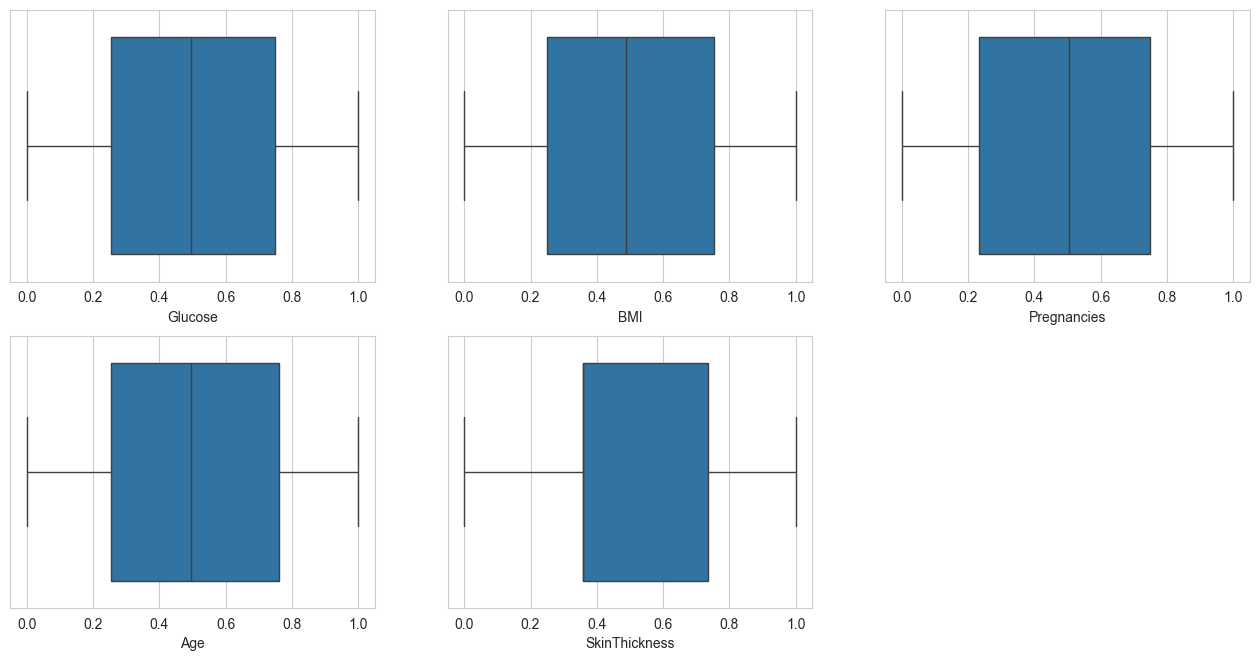

In [19]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=data_new['Glucose'],data=data_new)
plt.subplot(3,3,2)
sns.boxplot(x=data_new['BMI'],data=data_new)
plt.subplot(3,3,3)
sns.boxplot(x=data_new['Pregnancies'],data=data_new)
plt.subplot(3,3,4)
sns.boxplot(x=data_new['Age'],data=data_new)
plt.subplot(3,3,5)
sns.boxplot(x=data_new['SkinThickness'],data=data_new)

In [20]:
from sklearn.preprocessing import StandardScaler

X = data_new.drop("Outcome", axis=1)  # Fitur
y = data_new["Outcome"]              # Label

scaler = StandardScaler()
data_final = scaler.fit_transform(X)
data_final = pd.DataFrame(data_final, columns=X.columns)
data_final["Outcome"] = y.values

print("Data asli:\n")
print(data_new.head())
print("\nData setelah standardisasi:\n")
print(data_final.head())

Data asli:

   Pregnancies   Glucose  SkinThickness       BMI       Age  Outcome
0     0.747718  0.810300       0.801825  0.591265  0.889831      1.0
1     0.232725  0.091265       0.644720  0.213168  0.558670      0.0
2     0.863755  0.956975       0.357888  0.077575  0.585398      1.0
3     0.232725  0.124511       0.357888  0.284224  0.000000      0.0
4     0.000000  0.721643       0.801825  0.926988  0.606258      1.0

Data setelah standardisasi:

   Pregnancies   Glucose  SkinThickness       BMI       Age  Outcome
0     0.850928  1.073298       1.061906  0.315445  1.336158      1.0
1    -0.847971 -1.414423       0.508656 -0.992662  0.210426      0.0
2     1.233718  1.580765      -0.501428 -1.461776  0.301282      1.0
3    -0.847971 -1.299397      -0.501428 -0.746828 -1.688693      0.0
4    -1.615701  0.766561       1.061906  1.476953  0.372194      1.0


## Split the DataFrame into X and y

Memisahkan data fitur (X) dan data target/label (y)

In [21]:
target_name='Outcome'
y= data_final[target_name]
X=data_final.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [22]:
X.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.850928,1.073298,1.061906,0.315445,1.336158
1,-0.847971,-1.414423,0.508656,-0.992662,0.210426
2,1.233718,1.580765,-0.501428,-1.461776,0.301282
3,-0.847971,-1.299397,-0.501428,-0.746828,-1.688693
4,-1.615701,0.766561,1.061906,1.476953,0.372194


In [23]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

## Train Test Split

Membagi data training sebesar 80% dan data testing sebesar 20%

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
X_train.shape,y_train.shape

((614, 5), (614,))

Ada 614 baris (data training) dan 5 kolom (fitur) dalam data.

In [26]:
X_test.shape, y_test.shape

((154, 5), (154,))

## K-Nearest Neighbor

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV

Melakukan tunning hyperparamter untuk model KNN berdasarkan F1 score.

In [28]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(1,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [29]:
best_model = grid_search.fit(X_train,y_train)

In [30]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 16


In [31]:
best_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 16,
 'p': 1,
 'weights': 'distance'}

Best leaf_size: 30
Menunjukkan bahwa ukuran leaf terbaik yang dipilih adalah 30. Nilai ini memengaruhi efisiensi pencarian dalam struktur pohon (kd-tree atau ball-tree), tetapi tidak memengaruhi hasil prediksi.

Best p: 1
Model menggunakan Manhattan Distance untuk menghitung jarak antara data. Manhattan Distance mengukur jarak dalam garis lurus horizontal dan vertikal, yang sering bekerja lebih baik pada dataset dengan fitur berbobot secara berbeda.

Best n_neighbors: 16
Model memilih 16 tetangga terdekat untuk membuat prediksi. Jumlah ini merupakan hasil optimasi untuk mendapatkan performa terbaik.

In [32]:
#Predict testing set
knn_pred = best_model.predict(X_test)
print("Classification Report is:\n",classification_report(y_test,knn_pred))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       107
         1.0       0.69      0.66      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



In [33]:
# Evaluasi model
accuracy_knn = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)

# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy_knn:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Akurasi: 0.8052
Precision: 0.6889
Recall: 0.6596
F1-Score: 0.6739


In [34]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, knn_pred)
cm

array([[93, 14],
       [16, 31]], dtype=int64)

True Positives (TP): Prediksi benar untuk kelas positif (31).
True Negatives (TN): Prediksi benar untuk kelas negatif (93).
False Negatives (FN): Prediksi salah untuk kelas positif (16).
False Positives (FP): Prediksi salah untuk kelas negatif (14).

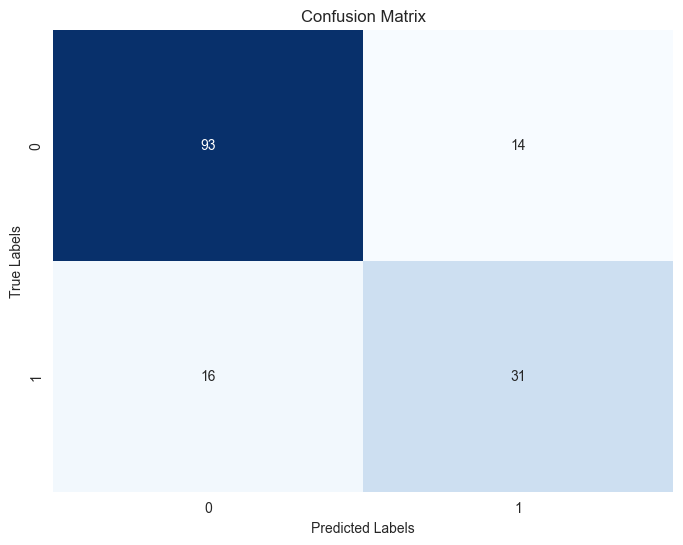

In [35]:
# Membuat heatmap dengan angka
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

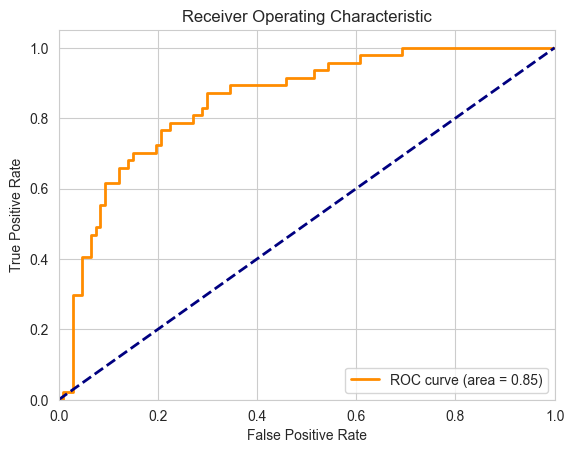

In [36]:
from sklearn.metrics import roc_curve, auc

# Predict the probability scores
y_prob = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## NAIVE BAYES

In [37]:
# Import library yang dibutuhkan
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes (GaussianNB)
nb = GaussianNB()

# Latih model dengan data pelatihan
nb.fit(X_train, y_train)

# Prediksi menggunakan data uji
y_pred = nb.predict(X_test)

# Evaluasi model
accuracy_nb = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#Predict testing set
print("Classification Report is:\n",classification_report(y_test,y_pred))

# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy_nb:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       107
         1.0       0.61      0.66      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154

Akurasi: 0.7662
Precision: 0.6078
Recall: 0.6596
F1-Score: 0.6327


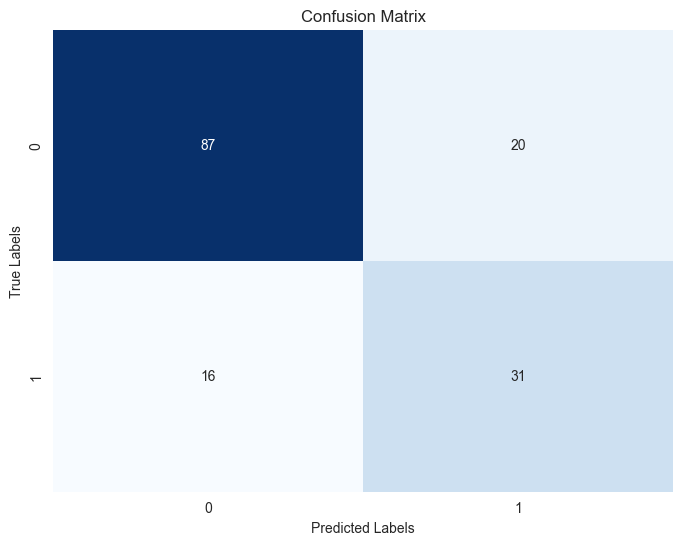

In [38]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap dengan angka
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

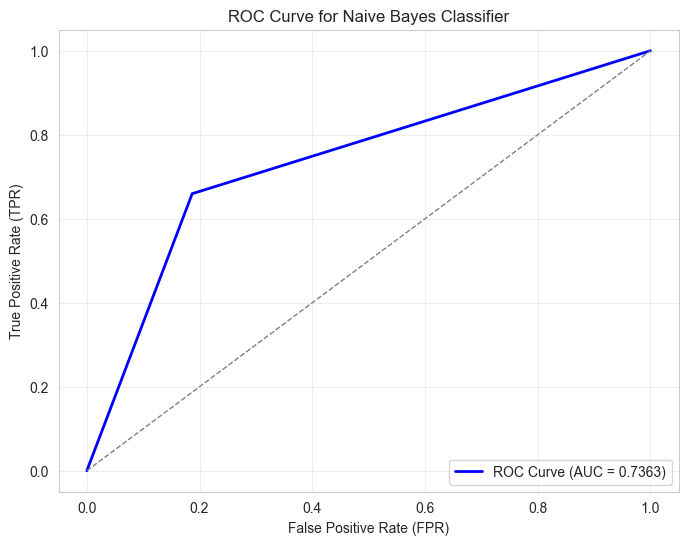

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

# Hitung probabilitas prediksi untuk kelas positif
y_prob = nb.predict_proba(X_test)[:]  # Probabilitas untuk kelas positif (1)

if y_prob.ndim == 2:
    y_prob = np.argmax(y_prob, axis=1)

# Hitung FPR, TPR, dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Hitung AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_prob)

# Gambar kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Garis diagonal sebagai baseline
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Naive Bayes Classifier")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


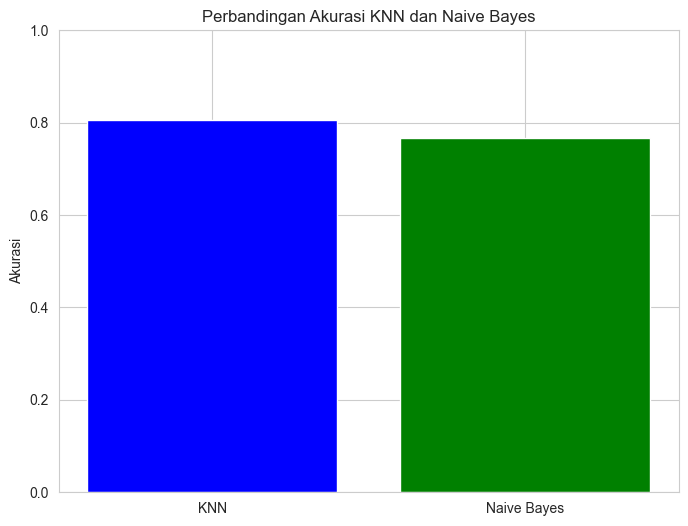

In [40]:
# Visualisasi perbandingan akurasi
models = ['KNN', 'Naive Bayes']
accuracies = [accuracy_knn, accuracy_nb]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)  # Rentang akurasi antara 0 hingga 1
plt.title('Perbandingan Akurasi KNN dan Naive Bayes')
plt.ylabel('Akurasi')
plt.show()

c:\Users\lapto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\lapto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


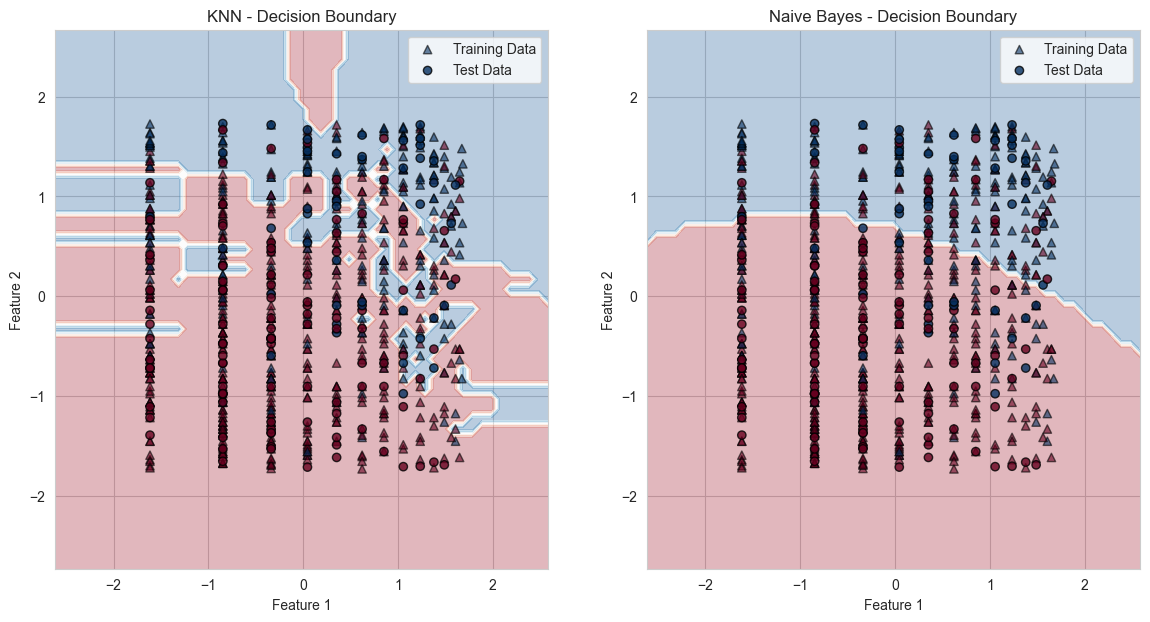

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Misalnya kita menggunakan dua fitur untuk visualisasi
X_train_reduced = X_train.iloc[:, :2]  # Pilih dua fitur pertama untuk visualisasi
X_test_reduced = X_test.iloc[:, :2]

# Melatih model menggunakan data latih
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_reduced, y_train)

nb = GaussianNB()
nb.fit(X_train_reduced, y_train)

# Membuat grid untuk visualisasi decision boundary
x_min, x_max = X_train_reduced.iloc[:, 0].min() - 1, X_train_reduced.iloc[:, 0].max() + 1
y_min, y_max = X_train_reduced.iloc[:, 1].min() - 1, X_train_reduced.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Memprediksi kelas untuk setiap titik di grid untuk KNN dan Naive Bayes
Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

Z_nb = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z_nb = Z_nb.reshape(xx.shape)

# Plotting decision boundary untuk KNN
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)  # Subplot untuk KNN
plt.contourf(xx, yy, Z_knn, alpha=0.3, cmap=plt.cm.RdBu)
plt.scatter(X_train_reduced.iloc[:, 0], X_train_reduced.iloc[:, 1], c=y_train, cmap=plt.cm.RdBu, marker='^', edgecolors='k', label='Training Data', alpha=0.6)
plt.scatter(X_test_reduced.iloc[:, 0], X_test_reduced.iloc[:, 1], c=y_test, cmap=plt.cm.RdBu, marker='o', edgecolors='k', label='Test Data', alpha=0.8)
plt.title("KNN - Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plotting decision boundary untuk Naive Bayes
plt.subplot(1, 2, 2)  # Subplot untuk Naive Bayes
plt.contourf(xx, yy, Z_nb, alpha=0.3, cmap=plt.cm.RdBu)
plt.scatter(X_train_reduced.iloc[:, 0], X_train_reduced.iloc[:, 1], c=y_train, cmap=plt.cm.RdBu, marker='^', edgecolors='k', label='Training Data', alpha=0.6)
plt.scatter(X_test_reduced.iloc[:, 0], X_test_reduced.iloc[:, 1], c=y_test, cmap=plt.cm.RdBu, marker='o', edgecolors='k', label='Test Data', alpha=0.8)
plt.title("Naive Bayes - Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Tampilkan plot
plt.show()